In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

log_file_path = 'C:\\Users\\91742\\Desktop\\Vavye Mobility\\HVAC Plots\\HVAC_output_4_5L_22SP_Medium_kp25_ki1.log'

with open(log_file_path, 'r') as file:
    data = file.read().strip().split(',')

# Extract DutyCycle and Temperature values from the data, skipping empty strings
duty_cycle_values = [float(data[i]) for i in range(0, len(data), 2) if data[i]]
temperature_values = [float(data[i]) for i in range(1, len(data), 2) if data[i]]


In [12]:
# Apply z-score filtering to DutyCycle values
duty_cycle_z_scores = zscore(duty_cycle_values)
duty_cycle_z_score_threshold = 2.0
filtered_duty_cycle_values = [duty if abs(z) < duty_cycle_z_score_threshold else None for duty, z in zip(duty_cycle_values, duty_cycle_z_scores)]

# Apply z-score filtering to Temperature values
temperature_z_scores = zscore(temperature_values)
temperature_z_score_threshold = 2.0
filtered_temperature_values = [temp if abs(z) < temperature_z_score_threshold else None for temp, z in zip(temperature_values, temperature_z_scores)]


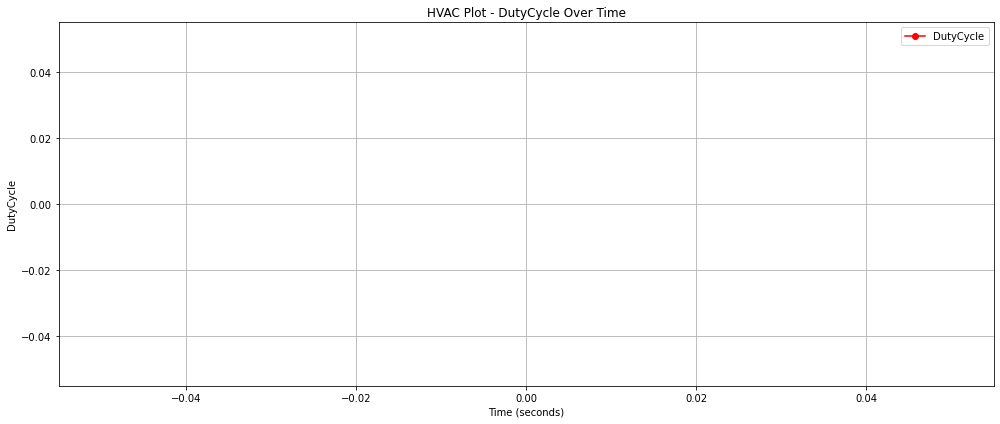

In [13]:
# Create DataFrames
df_duty_cycle = pd.DataFrame(filtered_duty_cycle_values, columns=['DutyCycle'])
df_temperature = pd.DataFrame(filtered_temperature_values, columns=['Temperature'])

# Plot DutyCycle vs Time
plt.figure(figsize=(14, 6))
plt.plot(df_duty_cycle.index, df_duty_cycle['DutyCycle'], marker='o', linestyle='-', color='r', label='DutyCycle')
plt.title('HVAC Plot - DutyCycle Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('DutyCycle')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


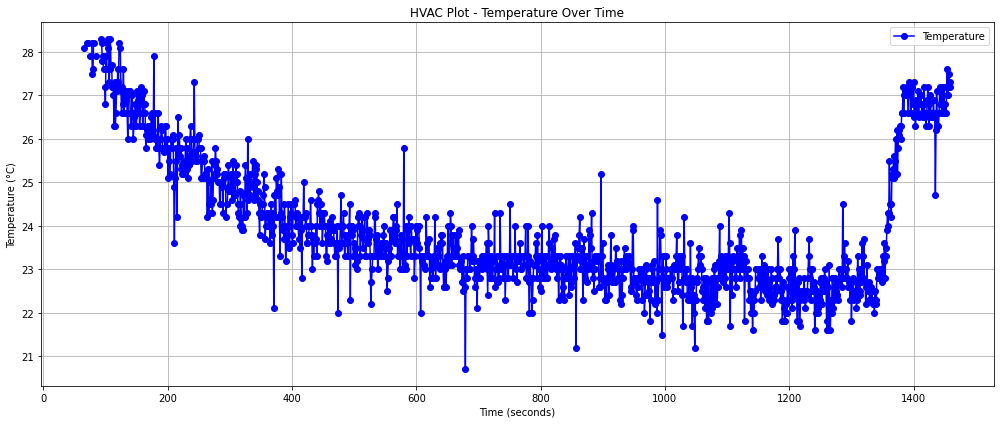

In [14]:
# Plot Temperature vs Time
plt.figure(figsize=(14, 6))
plt.plot(df_temperature.index, df_temperature['Temperature'], marker='o', linestyle='-', color='b', label='Temperature')
plt.title('HVAC Plot - Temperature Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
# Save filtered data to CSV files
df_duty_cycle.to_csv('duty_cycle_data_filtered3.csv', index=False)
df_temperature.to_csv('temperature_data_filtered3.csv', index=False)
